<a href="https://colab.research.google.com/github/ujanichakma/AI_LAB_4-1_2025/blob/main/AI_final_assignment/AI_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


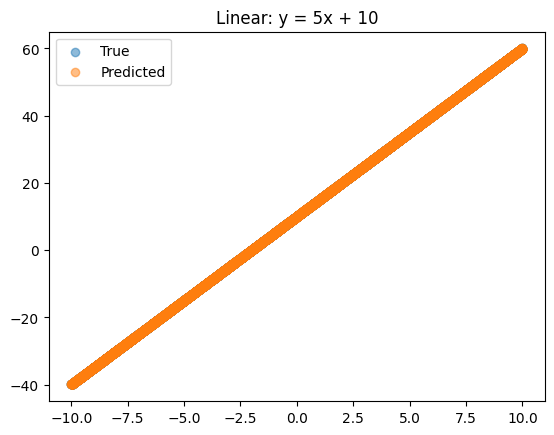

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


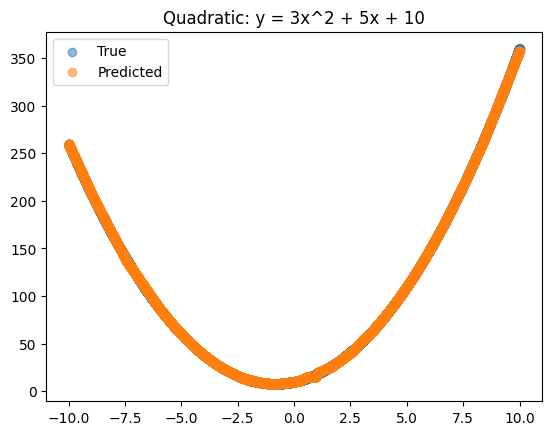

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


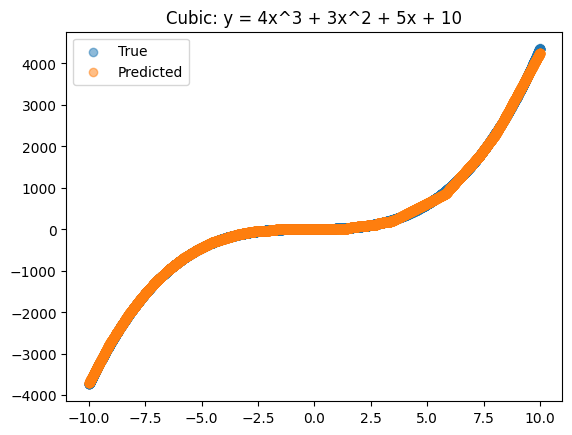

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


# ---------------- MODEL ----------------
def build_model():
    inputs = Input((1,))
    h0 = Dense(8, activation='relu')(inputs)
    h1 = Dense(16, activation='relu')(h0)
    h2 = Dense(32, activation='relu')(h1)
    h3 = Dense(8, activation='relu')(h2)
    outputs = Dense(1)(h3)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# ---------------- POLYNOMIALS ----------------
def linear_fn(x):
    return 5*x + 10

def quadratic_fn(x):
    return 3*x**2 + 5*x + 10

def cubic_fn(x):
    return 4*x**3 + 3*x**2 + 5*x + 10


# ---------------- DATA ----------------
def generate_data(fn, n=50000):
    x = np.random.uniform(-10, 10, n)
    y = fn(x)
    return x, y


def split_data(x, y):
    idx = np.random.permutation(len(x))
    x, y = x[idx], y[idx]

    train_n = int(0.7*len(x))
    val_n   = int(0.1*len(x))

    trainX, trainY = x[:train_n], y[:train_n]
    valX, valY     = x[train_n:train_n+val_n], y[train_n:train_n+val_n]
    testX, testY   = x[train_n+val_n:], y[train_n+val_n:]

    return (trainX,trainY),(valX,valY),(testX,testY)


# ---------------- TRAIN & PLOT ----------------
def run_experiment(fn, title):
    x, y = generate_data(fn)
    (trainX,trainY),(valX,valY),(testX,testY) = split_data(x,y)

    model = build_model()
    model.fit(trainX, trainY, validation_data=(valX,valY),
              epochs=15, batch_size=64, verbose=0)

    y_pred = model.predict(testX)

    plt.figure()
    plt.scatter(testX, testY, label="True", alpha=0.5)
    plt.scatter(testX, y_pred, label="Predicted", alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.show()


# ---------------- MAIN ----------------
def main():
    run_experiment(linear_fn, "Linear: y = 5x + 10")
    run_experiment(quadratic_fn, "Quadratic: y = 3x^2 + 5x + 10")
    run_experiment(cubic_fn, "Cubic: y = 4x^3 + 3x^2 + 5x + 10")


if __name__ == "__main__":
    main()